In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

<center>
  <h1>🎗️ Exploratory Data Analysis of Breast Cancer Dataset</h1>
</center>


<h2>🎯 Objective</h2>
<p>
  The primary goal of this analysis is to explore the heart disease dataset and uncover patterns and insights that can help predict whether an individual is likely to have heart disease or not. <br><br>
  This will be achieved through thorough exploratory data analysis (EDA), identifying key features, and preparing the data for predictive modeling.
</p>


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


<
<center>
  <h3>📄 First 5 Rows (df.head())</h3>
</center>

<p>
The <code>head()</code> method displays the first few rows of the dataset, which helps to get an initial view of the data structure and values.
</p>


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<center>
  <h3>📄 Last 5 Rows (df.tail())</h3>
</center>

<p>
The <code>tail()</code> method displays the last few rows, which helps identify issues at the end of the dataset such as trailing nulls or outliers.
</p>



In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.size

18208

<center>
  <h3>📄 DataFrame Information</h3>
  <p>We use <code>df.info()</code> to get a concise summary of the DataFrame including column data types and non-null counts.</p>
</center>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<center>
  <h3>🧩 Missing Values</h3>
  <p>Using <code>df.isnull().sum()</code>, we identify missing values in each column.</p>
</center>


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<center>
  <h3>📊 Descriptive Statistics</h3>
  <p><code>df.describe()</code> gives us a statistical summary of the numerical features including mean, standard deviation, and quartiles.</p>
</center>


In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<center>
  <h3>🧬 Checking for Duplicates</h3>
  <p>We use <code>df.duplicated().sum()</code> to count and handle any duplicate rows in the dataset.</p>
</center>

In [9]:
df.duplicated().sum()

0

<center>
  <h3>📊 Importing Visualization Libraries</h3>
</center>

<p>
We use <code>matplotlib.pyplot</code> and <code>seaborn</code> for data visualization. 
<code>matplotlib</code> provides basic plotting functions, while <code>seaborn</code> makes statistical plots easier and more attractive.
</p>


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

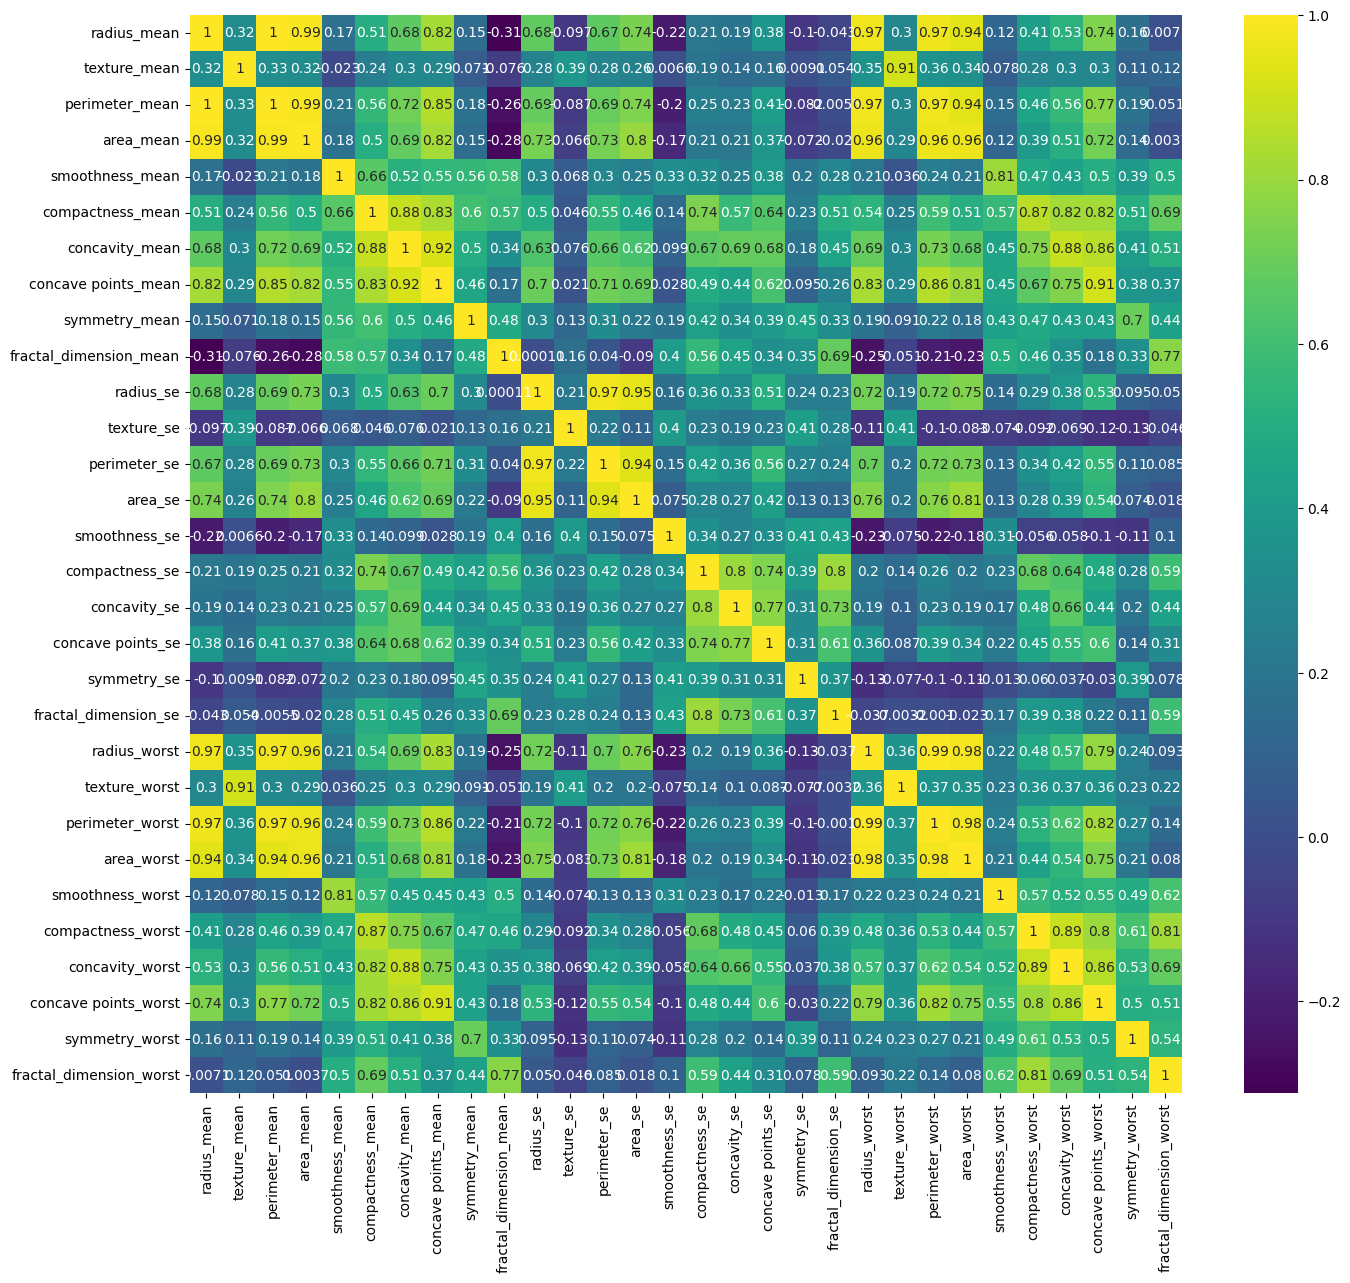

In [11]:
plt.figure(figsize=(16,14))
sns.heatmap(df.drop('id',axis=1).corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()

<center>
  <h3>🔤 Encoding Categorical Data</h3>
</center>

<p>
We use <code>LabelEncoder</code> from <code>sklearn.preprocessing</code> to convert categorical values into numeric form.  
Here, the <code>'diagnosis'</code> column is transformed into numbers, which is necessary for machine learning algorithms.
</p>


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['diagnosis']= encoder.fit_transform(df['diagnosis'])

<center>
  <h3>🎯 Feature and Target Split</h3>
</center>

<p>
We separate the dataset into <code>X</code> (features) and <code>y</code> (target).  
Here, <code>X</code> contains all columns except <code>'id'</code> and <code>'diagnosis'</code>,  
while <code>y</code> contains the <code>'diagnosis'</code> column, which we want to predict.
</p>


In [13]:
x = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']

<center>
  <h3>🧪 Train-Test Split</h3>
</center>

<p>
We use <code>train_test_split</code> from <code>sklearn.model_selection</code> to divide the dataset into training and testing sets.  
Here, <code>25%</code> of the data is used for testing, and the rest <code>75%</code> for training.  
Setting <code>random_state=42</code> ensures reproducibility of the split.
</p>


In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

<center>
  <h3>⚖️ Feature Scaling</h3>
</center>

<p>
We use <code>StandardScaler</code> from <code>sklearn.preprocessing</code> to scale the features.  
Scaling ensures that all features have a mean of 0 and a standard deviation of 1,  
which helps many machine learning algorithms perform better.  
We fit and transform the training data, but only transform the test data to avoid data leakage.
</p>


In [15]:
from sklearn.preprocessing import StandardScaler  # ✅ Correct import

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)       


<center>
  <h3>📈 Importing Logistic Regression</h3>
</center>

<p>
We import <code>LogisticRegression</code> from <code>sklearn.linear_model</code>.  
Logistic Regression is a simple and widely used algorithm for binary classification tasks,  
like predicting whether a patient has heart disease or not.
</p>


In [16]:
from sklearn.linear_model import LogisticRegression

<center>
  <h3>🤖 Initializing Logistic Regression Model</h3>
</center>

<p>
We create an instance of <code>LogisticRegression</code> with <code>max_iter=1000</code> to allow the solver enough iterations to converge.  
This model will be trained on the scaled training data to predict the target variable.
</p>


In [17]:
log_reg = LogisticRegression(max_iter=1000)


In [18]:
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

<center>
  <h3>🌳 Importing Random Forest Classifier</h3>
</center>

<p>
We import <code>RandomForestClassifier</code> from <code>sklearn.ensemble</code>.  
Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.  
It can be used for classification tasks like predicting heart disease.
</p>


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=800)

In [21]:
import numpy as np

<center>
  <h3>🔧 Hyperparameter Tuning with RandomizedSearchCV</h3>
</center>

<p>
We define a <code>param_dist</code> dictionary to specify hyperparameters for <code>RandomForestClassifier</code>.  
Then, <code>RandomizedSearchCV</code> will search over these combinations to find the best model configuration.  

Parameters explained:  
<ul>
  <li><code>n_estimators</code>: Number of trees in the forest</li>
  <li><code>max_depth</code>: Maximum depth of each tree</li>
  <li><code>min_samples_split</code>: Minimum samples required to split a node</li>
  <li><code>min_samples_leaf</code>: Minimum samples required at a leaf node</li>
  <li><code>max_features</code>: Number of features considered for splitting at each node</li>
</ul>
</p>


In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators' : np.arange(50,300,50),  #Number of trees
 'max_depth' : [None, 10, 20, 30 ,40],   # Depth of trees
 'min_samples_split': [2, 5, 10],        # MInimum sample to split
 'min_samples_leaf': [1, 2, 4],          # Minimum sampple per leaf
 'max_features': ['sqrt', 'log2', None]  # Feature considered per split
}

In [23]:
random_search = RandomizedSearchCV(
    rfc, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

In [24]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=800),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=42, scoring='accuracy')

<center>
  <h3>🏆 Displaying Best Model Parameters and Score</h3>
</center>

<p>
After running <code>RandomizedSearchCV</code>, we can view the best combination of hyperparameters and the corresponding score:  
<ul>
  <li><code>random_search.best_params_</code>: Shows the best hyperparameter values found</li>
  <li><code>random_search.best_score_</code>: Shows the mean cross-validated score of the best model</li>
</ul>
This helps us select the most optimal model for prediction.
</p>


In [25]:
print("Best parameters:", random_search.best_params_)  
print("Best Score:", random_search.best_score_)       

Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: 0.9600820793433653


In [26]:
best_model = random_search.best_estimator_
best_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=150)

<center>
  <h3>📊 Model Evaluation</h3>
</center>

<p>
After training the model, we evaluate its performance on the test set using several metrics:  
<ul>
  <li><code>accuracy_score</code>: Measures the overall accuracy of predictions</li>
  <li><code>confusion_matrix</code>: Shows the counts of true positives, true negatives, false positives, and false negatives</li>
  <li><code>classification_report</code>: Provides precision, recall, f1-score, and support for each class</li>
</ul>
We first predict the target values for <code>x_test</code> using <code>best_model.predict()</code> and then print these evaluation metrics.
</p>


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.972027972027972

Confusion Matrix:
 [[88  1]
 [ 3 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



<center>
  <h3>📈 ROC Curve & AUC</h3>
</center>

<p>
We plot the <code>ROC (Receiver Operating Characteristic)</code> curve to evaluate the classifier's performance across different thresholds.  
The <code>AUC (Area Under the Curve)</code> quantifies the overall ability of the model to discriminate between classes.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">
</pre>


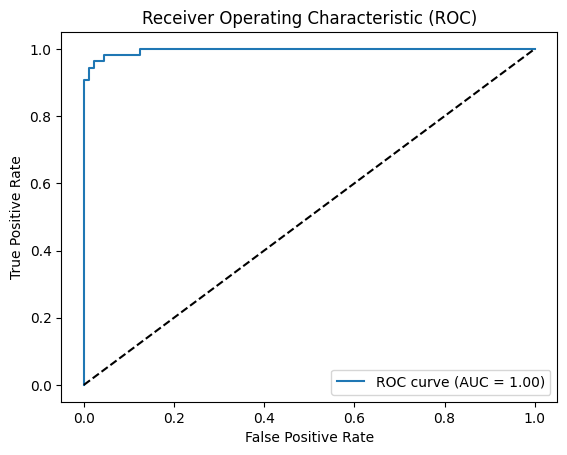

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


<center>
  <h3>🌟 Feature Importance</h3>
</center>

<p>
We visualize the importance of each feature in the trained model.  
Features with higher importance have a greater impact on the model's predictions.
</p>

<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


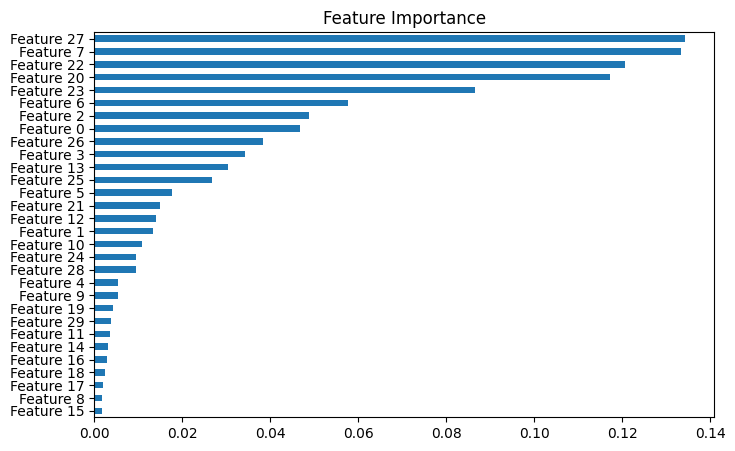

In [29]:
import pandas as pd
import numpy as np

feature_names = x_train.columns if isinstance(x_train, pd.DataFrame) else [f"Feature {i}" for i in range(x_train.shape[1])]

feature_importances = pd.Series(best_model.feature_importances_, index=feature_names)
feature_importances.sort_values().plot(kind='barh', figsize=(8,5), title='Feature Importance')
plt.show()
